In [20]:
#Ethydium bromide 10 ul/ml with Lambda DNA
#remeber! concentration is in ng/ml!!!

#4/05/17
blank = [46.146, 47.711, 47.179]

fluorometry_measurement_standard = {
"concentration [ng/ul]": [32000, 16000, 8000, 4000, 2000, 1000, 500, 250, 250/2, 250/4, 250/8, 250/16, 250/32, 0.00],
"fluorescence [RFU]" : [720.31, 375.62, 200.24, 126.23, 84.540, 66.349, 56.789, 58.876, 50.245, 47.108, 46.250, 47.216, 45.096, average(blank) ]
}

#len(fluorometry_measurement_standard["concentration [ng/ul]"])
#len(fluorometry_measurement_standard["fluorescence [RFU]"])

fluorometry_measurement_standard

{'concentration [ng/ul]': [32000,
  16000,
  8000,
  4000,
  2000,
  1000,
  500,
  250,
  125.0,
  62.5,
  31.25,
  15.625,
  7.8125,
  0.0],
 'fluorescence [RFU]': [720.31,
  375.62,
  200.24,
  126.23,
  84.54,
  66.349,
  56.789,
  58.876,
  50.245,
  47.108,
  46.25,
  47.216,
  45.096,
  47.012]}

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def average(number):
    return float(sum(number))/len(number)

sd_blank = np.std(blank)
average_blank = average(blank)
detection_limit = average_blank + 3*sd_blank

#lod is limit of detection
def lod(blank):
    sd_blank = np.std(blank)
    average_blank = average(blank)
    detection_limit = average_blank + 3*sd_blank
    print(sd_blank, average_blank, detection_limit )

In [22]:
lod(blank) # sd, average, detection ,limit

0.6497296873828883 47.012 48.96118906214866


In [23]:
def _createPredict(fluorometry_measurement_standard):
    x = fluorometry_measurement_standard["concentration [ng/ul]"]
    y = fluorometry_measurement_standard["fluorescence [RFU]"]
    p = np.polyfit(x, y, 2)    
    return np.poly1d(p)
   
predict = _createPredict(fluorometry_measurement_standard)

def plot(fluorometry_measurement_standard):
    predict = _createPredict(fluorometry_measurement_standard)
    x = fluorometry_measurement_standard["concentration [ng/ul]"]
    y = fluorometry_measurement_standard["fluorescence [RFU]"]
    px = np.arange(min(x), max(x)+1, 1)
    py = [predict(xx) for xx in px]
   # plt.axis([0, 40, 0, 50])
    
    plt.plot(x, y, 'ro')
    plt.plot(px, py)
    plt.show()

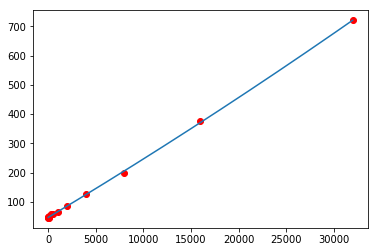

In [24]:
plot(fluorometry_measurement_standard)

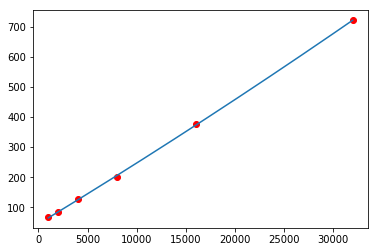

In [26]:
#comments: 
#measurement range: 1000 ng/ml up to porbably more than 32000 ng/ml 

fluorometry_measurement_standard_minus7_last_points = {
"concentration [ng/ul]": [32000, 16000, 8000, 4000, 2000, 1000],
"fluorescence [RFU]" : [720.31, 375.62, 200.24, 126.23, 84.540, 66.349]
}


plot(fluorometry_measurement_standard_minus7_last_points)


In [29]:
#Ethydium bromide 0.1 ul/ml with Lambda DNA
#remeber! concentration is in ng/ml!!!

#4/05/17
blank2 = [12.299, 13.834, 13.132]

fluorometry_measurement_standard_01 = {
"concentration [ng/ul]": [32000, 16000, 8000, 4000, 2000, 1000, 500, 250, 25, 2.5, 0.25, 0.025, 0.00],
"fluorescence [RFU]" : [22.134, 21.626, 23.733, 22.332, 20.326, 17.400, 16.368, 14.543, 12.653, 12.770, 11.232, 11.562, average(blank2)]
}

lod(blank2)

len(fluorometry_measurement_standard_01["concentration [ng/ul]"])
#len(fluorometry_measurement_standard_01["fluorescence [RFU]"])

blank standard deviation: 0.62742135407998
blank average: 13.088333333333333
detection limit: 14.970597395573273


13

In [30]:
plot(fluorometry_measurement_standard_01)

TypeError: plot() missing 1 required positional argument: 'y_values'

In [ ]:
#detection limit is 14.97 and in this reason I deletd 6 last points, and 4 last points

fluorometry_measurement_standard_01_minus_6_last_points = {
"concentration [ng/ul]": [2000, 1000, 500],
"fluorescence [RFU]" : [20.326, 17.400, 16.368]
}

plot(fluorometry_measurement_standard_01_minus_6_last_points)

In [3]:
%run ../../functions.ipynb


name = "Ethydium Bromide"
control = [{"name": "dsDNA",
        "fluorescences": [94.810, 91.615, 90.352]}]
        
data = [{"name": "dsDNA + RNA",
        "fluorescences": [152.53, 159.58, 169.36]},
        {"name": "dsDNA + ssDNA",
        "fluorescences": [148.87, 153.82, 158.06]},
        {"name": "dsDNA + protein",
        "fluorescences": [116.67, 113.28, 114.22]}]

results= specificity_assay(control, data, name)
results
control

[{'average': 92.25900000000001,
  'cv': 0.020334885750596044,
  'fluorescences': [94.81, 91.615, 90.352],
  'name': 'dsDNA',
  'standard_deviation': 1.8760762244642408}]

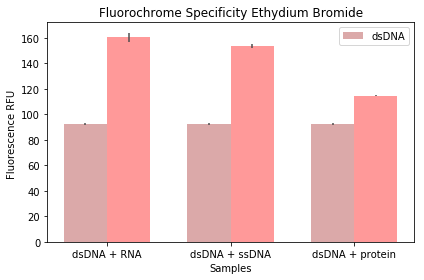

In [14]:
double_bar_graph((np.repeat(control[0]["average"], 3)),
                 results["average"],
                 results["name"],
                 sd_1=(np.repeat(control[0]["standard_deviation"], 3)),
                 sd_2=results["standard_deviation"].values,
                 xlabel="Samples", ylabel="Fluorescence RFU ", title=("Fluorochrome Specificity "+ str(name)),
                legend_1="dsDNA", legend_2="", colour1 = "brown" )

In [2]:
ethydium_bromide_specificity = np.array(results["specificity"])
ethydium_bromide_specificity_average = average(np.array(results["specificity"]))
ethydium_bromide_specificity



NameError: name 'np' is not defined

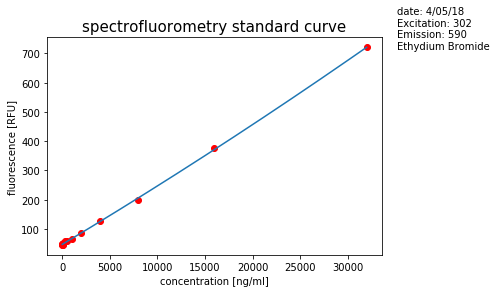

blank standard deviation: 0.6497296873828883
blank average: 47.012
detection limit: 48.96118906214866


In [27]:
%run ../../functions.ipynb
fluorometry_measurement_standard = {"date" : "4/05/18",
"standard name" : "Lambda DBA",
"concentration": [32000, 16000, 8000, 4000, 2000, 1000, 500, 250, 250/2, 250/4, 250/8, 250/16, 250/32, 0.00],                                  
"fluorescence [RFU]" : [720.31, 375.62, 200.24, 126.23, 84.540, 66.349, 56.789, 58.876, 50.245, 47.108, 46.250, 47.216, 45.096, 47.012],
"concentration units" : "[ng/ml]",
"Excitation" : "302", 
"Emission"  : "590",
"fluorochrome" : "Ethydium Bromide",
"blank" : [46.146, 47.711, 47.179]                                    
}

blank = [46.146, 47.711, 47.179]

plot_with_more_data(fluorometry_measurement_standard["concentration"],
                   fluorometry_measurement_standard["fluorescence [RFU]"],
                   fluorometry_measurement_standard["date"],
                   fluorometry_measurement_standard["Excitation"],
                   fluorometry_measurement_standard["Emission"],
                   fluorometry_measurement_standard["fluorochrome"])


lod(blank)
blank = [46.146, 47.711, 47.179]


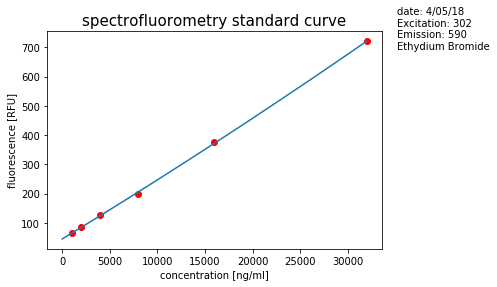

blank standard deviation: 0.6497296873828883
blank average: 47.012
detection limit: 48.96118906214866


In [31]:

fluorometry_measurement_standard_1 = {"date" : "4/05/18",
"standard name" : "Lambda DNA",
"concentration": [32000, 16000, 8000, 4000, 2000, 1000],                                  
"fluorescence [RFU]" : [720.31, 375.62, 200.24, 126.23, 84.540, 66.349],
"concentration units" : "[ng/ml]",
"Excitation" : "302", 
"Emission"  : "590",
"fluorochrome" : "Ethydium Bromide",
"blank" : [46.146, 47.711, 47.179]                                    
}

blank = [46.146, 47.711, 47.179]

plot_with_more_data(fluorometry_measurement_standard_1["concentration"],
                   fluorometry_measurement_standard_1["fluorescence [RFU]"],
                   fluorometry_measurement_standard_1["date"],
                   fluorometry_measurement_standard_1["Excitation"],
                   fluorometry_measurement_standard_1["Emission"],
                   fluorometry_measurement_standard_1["fluorochrome"])


lod(blank)
blank = [46.146, 47.711, 47.179]


In [1]:
control

NameError: name 'control' is not defined